## autoencoder on MNIST
Name:Mohammad Hosseinipour

In [48]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Model, Sequential
from IPython import display
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
#[0, 255] to [0,1]
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [43]:
x_test, x_validation,y_test, y_validation = train_test_split(x_test,y_test, test_size=0.33, random_state=42)

# Creating the Encoder and Decoder.

## first lets explain some entities:

### Dropout():

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

### LeakyReLU():

Leaky Rectified Linear Unit, or Leaky ReLU, is a type of activation function based on a ReLU, but it has a small slope for negative values instead of a flat slope. The slope coefficient is determined before training, i.e. it is not learnt during training. This type of activation function is popular in tasks where we we may suffer from sparse gradients, for example training generative adversarial networks.

### Dense():

It's the most basic layer in neural networks. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

### Letant Size:

Latent size is the size of the latent space: the vector holding the information after compression. This value is a crucial hyperparameter. If this value is too small, there won’t be enough data for reconstruction and if the value is too large, overfitting can occur.

In [56]:
#input: 28*28=784
# latent=64
LATENT_SIZE=64
encoder = Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(512),
    layers.Activation(activations.relu),
    layers.Dense(256),
    layers.Activation(activations.relu),
    layers.Dense(128),
    layers.Activation(activations.relu),
    layers.Dense(LATENT_SIZE),
    layers.Activation(activations.relu)
])
decoder = Sequential([
    layers.Dense(128, input_shape = (LATENT_SIZE,)),
    layers.Activation(activations.relu),
    layers.Dense(256),
    layers.Activation(activations.relu),
    layers.Dense(512),
    layers.Activation(activations.relu),
    layers.Dense(784),
    layers.Activation(activations.sigmoid),
    layers.Reshape((28, 28))
])

In [57]:
img = layers.Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [58]:
model.fit(x_train, x_train, epochs=15, batch_size=256,validation_data=(x_validation, x_validation))

Epoch 1/15
235/235 [==============================] - 5s 17ms/step - loss: 0.2106 - val_loss: 0.1640
Epoch 2/15
235/235 [==============================] - 4s 16ms/step - loss: 0.1473 - val_loss: 0.1384
Epoch 3/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1316 - val_loss: 0.1244
Epoch 4/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1214 - val_loss: 0.1208
Epoch 5/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1148 - val_loss: 0.1113
Epoch 6/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1101 - val_loss: 0.1064
Epoch 7/15
235/235 [==============================] - 3s 14ms/step - loss: 0.1063 - val_loss: 0.1093
Epoch 8/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1035 - val_loss: 0.1018
Epoch 9/15
235/235 [==============================] - 3s 14ms/step - loss: 0.1011 - val_loss: 0.1011
Epoch 10/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0991 - val_lo

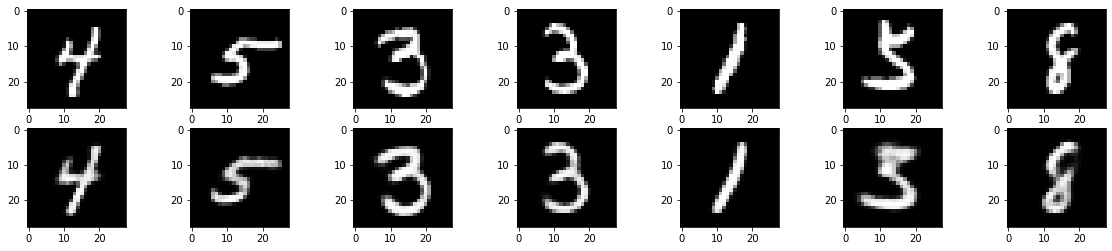

In [59]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

plt.figure(figsize=(20, 4))
for i in range(1,8):
    ax = plt.subplot(2, 7, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax = plt.subplot(2, 7, i+7)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()